In [1]:
%matplotlib inline
import galpy
import numpy as np
import scipy as sp
from matplotlib.pylab import plt, xlim, ylim
from astropy import units as u

from galpy.df import streamdf
from galpy.orbit import Orbit
from galpy.potential import LogarithmicHaloPotential, MWPotential2014, IsochronePotential
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.util import conversion #for unit conversions

In [2]:
sigv= 9.2 #km/s

#Set up potentials
lp= LogarithmicHaloPotential(normalize=1.,q=0.9)
mw= MWPotential2014[2]*1.5

#Set up orbits
orb_doc= Orbit([1.56148083,0.35081535,-1.15481504,0.88719443,-0.47713334,0.12019596])
orb_new= Orbit([337.2675994746023/8, 36.06614670750193/8, 1088.950249792649/8, 
                -286.8425553650681/220, 61.58222451126416/220, -66.40339287756248/220])
orb_Leo= Orbit.from_name('Leo I')

#Set up actionAngle instances
aAI_lp= actionAngleIsochroneApprox(pot=lp, b=0.8)

In [3]:
sdf= streamdf(sigv/220.,progenitor=orb_doc, pot=lp, aA=aAI_lp,leading=False,
              nTrackChunks=1,tdisrupt=4.5/conversion.time_in_Gyr(220.,8.))

In [4]:
#This block sees what values of b work with the streamdf command
#While 1.018 works with the orb_doc orbit, there has yet been a 
#value found for the orb_new orbit. 
"""
b = np.linspace(1,10,1001)

for r in b:
    aAI_mw= actionAngleIsochroneApprox(pot=mw, b=r)
    try:
        sdf= streamdf(sigv/220.,progenitor=orb_new, pot=mw, aA=aAI_mw,leading=False,
              nTrackChunks=1,tdisrupt=4.5/conversion.time_in_Gyr(220.,8.))
    except np.linalg.LinAlgError:
        print(f"{r} didn't work!")
    else:
        print(f"{r} works! No nans/infs reported.")
"""

'\nb = np.linspace(1,10,1001)\n\nfor r in b:\n    aAI_mw= actionAngleIsochroneApprox(pot=mw, b=r)\n    try:\n        sdf= streamdf(sigv/220.,progenitor=orb_new, pot=mw, aA=aAI_mw,leading=False,\n              nTrackChunks=1,tdisrupt=4.5/conversion.time_in_Gyr(220.,8.))\n    except np.linalg.LinAlgError:\n        print(f"{r} didn\'t work!")\n    else:\n        print(f"{r} works! No nans/infs reported.")\n'

In [ ]:
aAI_mw= actionAngleIsochroneApprox(pot=mw, b=1.0185)
sdf= streamdf(sigv/220.,progenitor=orb_doc, pot=mw, aA=aAI_mw,leading=False,
              nTrackChunks=1,tdisrupt=4.5/conversion.time_in_Gyr(220.,8.))

For some reason that escapes my understanding, b = 1.018 allows for the stream calculation in the Milky Way Potential:

1.0 didn't work!
1.009 didn't work!
1.018 works! No nans/infs reported.
1.027 didn't work!
/data/reu/jkittlin/miniconda3/envs/galpyenv/lib/python3.11/site-packages/galpy/df/streamdf.py:3257: RuntimeWarning: invalid value encountered in sqrt
  correlations= numpy.diag(0.5*numpy.ones(3))*numpy.sqrt(tsigOdiag*tsigadiag)

1.036 didn't work!
1.045 didn't work!

In [ ]:
#Now we do the same thing but smarter:
#Import function that estimates the correct scale length for an orbit object 
from galpy.actionAngle import estimateBIsochrone

#Integrate orbit over the Milky Way Potential! 
tf = np.linspace(0,-10,1001)*u.Gyr
orb_Leo.integrate(tf,mw)

#Finally, estimate the correct scale length to approx the potential over this orbit
bmin, bmed, bmax = estimateBIsochrone(mw,orb_Leo.R(tf),orb_Leo.z(tf))
print(bmin, bmed, bmax)

In [ ]:
#With these values, we run our search
b = np.linspace(bmin,bmax,1001)
b_fit = []

for r in b:
    aAI_mw= actionAngleIsochroneApprox(pot=mw, b=r)
    try:
        sdf= streamdf(sigv/220.,progenitor=orb_Leo, pot=mw, aA=aAI_mw,leading=False,
              nTrackChunks=1,tdisrupt=4.5/conversion.time_in_Gyr(220.,8.))
    except np.linalg.LinAlgError:
        print(f"{r} didn't work!")
    except ValueError:
        print(f"{r} produced a value error")
    else:
        print(f"No nans/infs reported. {r} works!")
        b_fit.append(r)

7.080148507929566 didn't work!
7.146966349590185 didn't work!
7.213784191250803 didn't work!
7.280602032911421 didn't work!
7.34741987457204 didn't work!
7.414237716232659 didn't work!
7.481055557893277 didn't work!
7.547873399553895 didn't work!
7.614691241214514 didn't work!
7.681509082875133 didn't work!
7.748326924535751 didn't work!
7.815144766196369 didn't work!
7.8819626078569875 didn't work!
7.948780449517606 didn't work!
8.015598291178225 didn't work!
8.082416132838842 didn't work!
8.149233974499461 didn't work!
8.21605181616008 didn't work!
8.282869657820697 didn't work!
8.349687499481316 didn't work!
8.416505341141935 didn't work!
8.483323182802554 didn't work!
8.550141024463173 didn't work!
8.61695886612379 didn't work!
8.683776707784409 produced a value error
8.750594549445028 didn't work!
8.817412391105645 didn't work!
8.884230232766264 didn't work!
8.951048074426883 produced a value error
9.017865916087501 produced a value error
9.08468375774812 didn't work!
9.1515015994

23.31688403145985 didn't work!
23.383701873120465 didn't work!
23.45051971478108 didn't work!
23.517337556441703 produced a value error
23.584155398102318 produced a value error
23.65097323976294 produced a value error
23.717791081423556 produced a value error
23.78460892308418 didn't work!
23.851426764744794 produced a value error
23.91824460640541 produced a value error
23.98506244806603 didn't work!
24.051880289726647 didn't work!
24.11869813138727 didn't work!
24.185515973047885 produced a value error
24.252333814708507 didn't work!
24.319151656369122 produced a value error
24.385969498029745 didn't work!
24.45278733969036 didn't work!
24.519605181350975 produced a value error
24.586423023011598 didn't work!
24.653240864672213 didn't work!
24.720058706332836 produced a value error
24.78687654799345 produced a value error
24.853694389654073 produced a value error
24.92051223131469 didn't work!
24.987330072975304 didn't work!
25.054147914635926 produced a value error
25.1209657562965

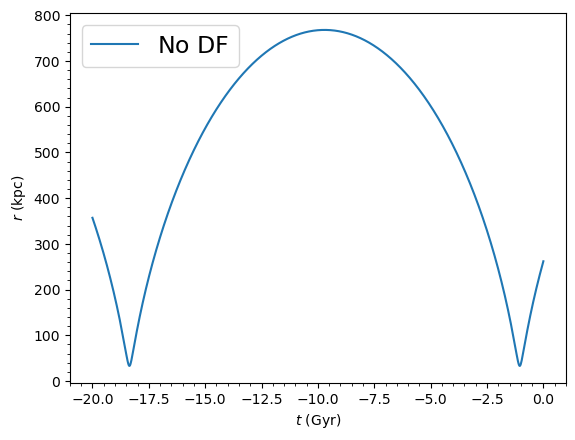

In [51]:
#Check if the orbit is bound! 
ts = np.linspace(0.,-20.,2002)*u.Gyr

#Solve for the orbit in the specified potential given the established initial positions
#Plain MW potential
orb_Leo= Orbit.from_name('Leo I')
orb_Leo.integrate(ts,mw)

#Plotting
orb_Leo.plot(d1='t',d2='r',label=r'$\mathrm{No\ DF}$')
plt.legend(fontsize=17.)

Winding back past the age of the Universe, galpy predicts that the orbit of Leo I is definitely bound within the Milky Way potential. However, this doesn't necessarily mean it is bound in the Isochrone Potential. Furthermore, the orbit taken predicts only one close passage to the Milky Way in contrast to the several passages needed to strip Leo I of its stellar stream. 

In [ ]:
galpy.potential.plotPotentials(mw)

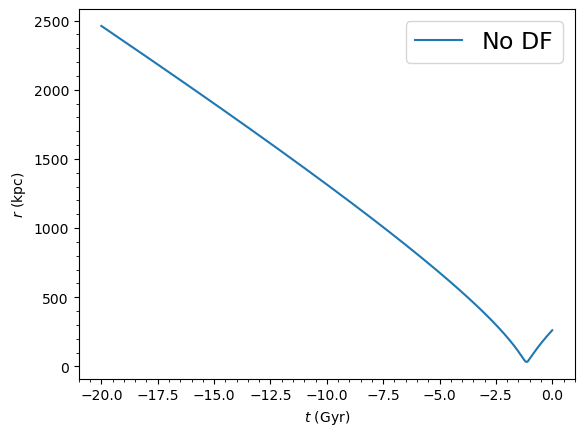

In [52]:
orb_Leo= Orbit.from_name('Leo I')

#Integrate using the Isochrone Potential
orb_Leo.integrate(ts, ip)

#Plotting
orb_Leo.plot(d1='t',d2='r',label=r'$\mathrm{No\ DF}$')
plt.legend(fontsize=17.)

This looks very much unbound over 20 Gyr, showing that it is over 2.5 Mpc away. This is problematic because if it's not possible to reasonably bound Leo I at the conditions it is now in a estimated Isochrone Potential, it wouldn't be possible to predict the orbit using action-Angle coordinates. 

258.2


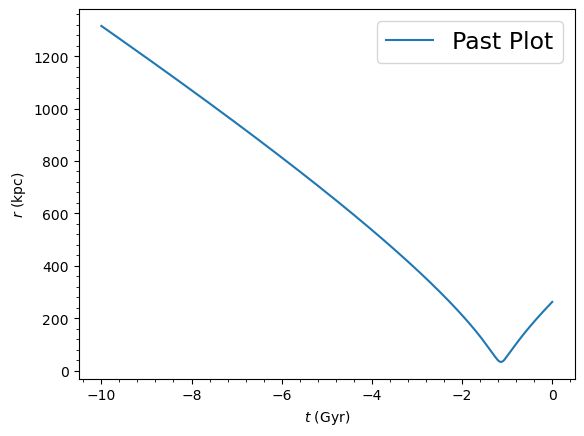

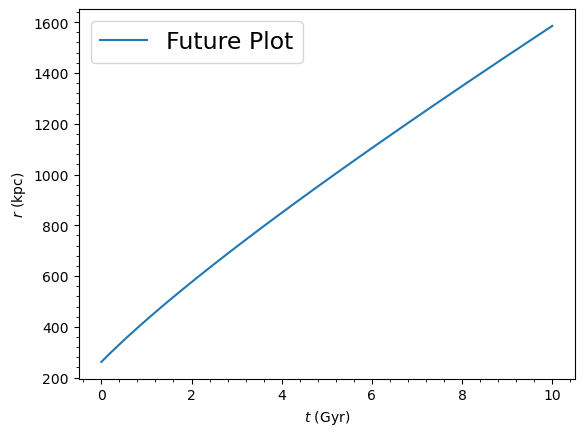

In [59]:
orb_Leo= Orbit.from_name('Leo I')
print(orb_Leo.dist())

t1 = np.linspace(0,-10,2002)*u.Gyr
orb_Leo.integrate(t1, ip)

orb_Leo.plot(d1='t',d2='r',label=r'Past Plot')
plt.legend(fontsize=17.)

t2 = np.linspace(0,10,2002)*u.Gyr
orb_Leo.integrate(t2, ip)

orb_Leo.plot(d1='t',d2='r',label=r'Future Plot')
plt.legend(fontsize=17.)